In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('Datasets/df_customer_train.csv')

In [3]:
df

,MAGIC_KEY,PURCHASE_COUNT,TOTAL_AMOUNT_SPENT,LAST_PURCHASE_DATE,DAY_SINCE_LAST_PURCHASE,AVERAGE_DIFF,10_2018_FIRST_15,11_2018_FIRST_15,12_2018_FIRST_15,1_2019_FIRST_15
0,249670911D8,1,13.96,2018-11-01,92 days,0 days 00:00:00,0,1,0,0
1,249751FC4DD,1,17.98,2018-10-12,112 days,0 days 00:00:00,1,0,0,0
2,24978027606,1,15.96,2018-10-19,105 days,0 days 00:00:00,0,0,0,0
3,24979164422,1,13.96,2018-11-30,63 days,0 days 00:00:00,0,0,0,0
4,2497B8B4FDA,2,33.94,2018-11-01,92 days,29 days 00:00:00,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1048931,2E6F53ECC13,1,19.98,2018-11-25,68 days,0 days 00:00:00,0,0,0,0
1048932,2E6F6DAFFF3,4,71.92,2019-01-19,13 days,30 days 16:00:00,0,0,0,0
1048933,2E6F72C6F1C,1,19.98,2018-10-21,103 days,0 days 00:00:00,0,0,0,0
1048934,2E6F9C7B9B4,1,19.98,2019-01-28,4 days,0 days 00:00:00,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048936 entries, 0 to 1048935
Data columns (total 10 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   MAGIC_KEY                1048936 non-null  object 
 1   PURCHASE_COUNT           1048936 non-null  int64  
 2   TOTAL_AMOUNT_SPENT       1048936 non-null  float64
 3   LAST_PURCHASE_DATE       1048936 non-null  object 
 4   DAY_SINCE_LAST_PURCHASE  1048936 non-null  object 
 5   AVERAGE_DIFF             1048936 non-null  object 
 6   10_2018_FIRST_15         1048936 non-null  int64  
 7   11_2018_FIRST_15         1048936 non-null  int64  
 8   12_2018_FIRST_15         1048936 non-null  int64  
 9   1_2019_FIRST_15          1048936 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 80.0+ MB


In [5]:
df['LAST_PURCHASE_DATE'] = pd.to_datetime(df['LAST_PURCHASE_DATE'])
df['DAY_SINCE_LAST_PURCHASE'] = pd.to_timedelta(df['DAY_SINCE_LAST_PURCHASE'])
df['AVERAGE_DIFF'] = pd.to_timedelta(df['AVERAGE_DIFF'])

In [6]:
df['DAY_SINCE_LAST_PURCHASE'] = df['DAY_SINCE_LAST_PURCHASE'].dt.days.astype(int)
df['AVERAGE_DIFF'] = df['AVERAGE_DIFF'].dt.days.astype(int)

In [7]:
df.drop(columns=['LAST_PURCHASE_DATE'], inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048936 entries, 0 to 1048935
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   MAGIC_KEY                1048936 non-null  object 
 1   PURCHASE_COUNT           1048936 non-null  int64  
 2   TOTAL_AMOUNT_SPENT       1048936 non-null  float64
 3   DAY_SINCE_LAST_PURCHASE  1048936 non-null  int32  
 4   AVERAGE_DIFF             1048936 non-null  int32  
 5   10_2018_FIRST_15         1048936 non-null  int64  
 6   11_2018_FIRST_15         1048936 non-null  int64  
 7   12_2018_FIRST_15         1048936 non-null  int64  
 8   1_2019_FIRST_15          1048936 non-null  int64  
dtypes: float64(1), int32(2), int64(5), object(1)
memory usage: 64.0+ MB


In [9]:
df

,MAGIC_KEY,PURCHASE_COUNT,TOTAL_AMOUNT_SPENT,DAY_SINCE_LAST_PURCHASE,AVERAGE_DIFF,10_2018_FIRST_15,11_2018_FIRST_15,12_2018_FIRST_15,1_2019_FIRST_15
0,249670911D8,1,13.96,92,0,0,1,0,0
1,249751FC4DD,1,17.98,112,0,1,0,0,0
2,24978027606,1,15.96,105,0,0,0,0,0
3,24979164422,1,13.96,63,0,0,0,0,0
4,2497B8B4FDA,2,33.94,92,29,1,1,0,0
...,...,...,...,...,...,...,...,...,...
1048931,2E6F53ECC13,1,19.98,68,0,0,0,0,0
1048932,2E6F6DAFFF3,4,71.92,13,30,0,0,0,0
1048933,2E6F72C6F1C,1,19.98,103,0,0,0,0,0
1048934,2E6F9C7B9B4,1,19.98,4,0,0,0,0,0


In [10]:
le = LabelEncoder() #creating an instance of LabelEncoder
df['MAGIC_KEY_ENCODED'] = le.fit_transform(df['MAGIC_KEY'])
df_encoded = df.drop(columns = ['MAGIC_KEY'])
df_encoded

,PURCHASE_COUNT,TOTAL_AMOUNT_SPENT,DAY_SINCE_LAST_PURCHASE,AVERAGE_DIFF,10_2018_FIRST_15,11_2018_FIRST_15,12_2018_FIRST_15,1_2019_FIRST_15,MAGIC_KEY_ENCODED
0,1,13.96,92,0,0,1,0,0,0
1,1,17.98,112,0,1,0,0,0,1
2,1,15.96,105,0,0,0,0,0,2
3,1,13.96,63,0,0,0,0,0,3
4,2,33.94,92,29,1,1,0,0,4
...,...,...,...,...,...,...,...,...,...
1048931,1,19.98,68,0,0,0,0,0,1048931
1048932,4,71.92,13,30,0,0,0,0,1048932
1048933,1,19.98,103,0,0,0,0,0,1048933
1048934,1,19.98,4,0,0,0,0,0,1048934


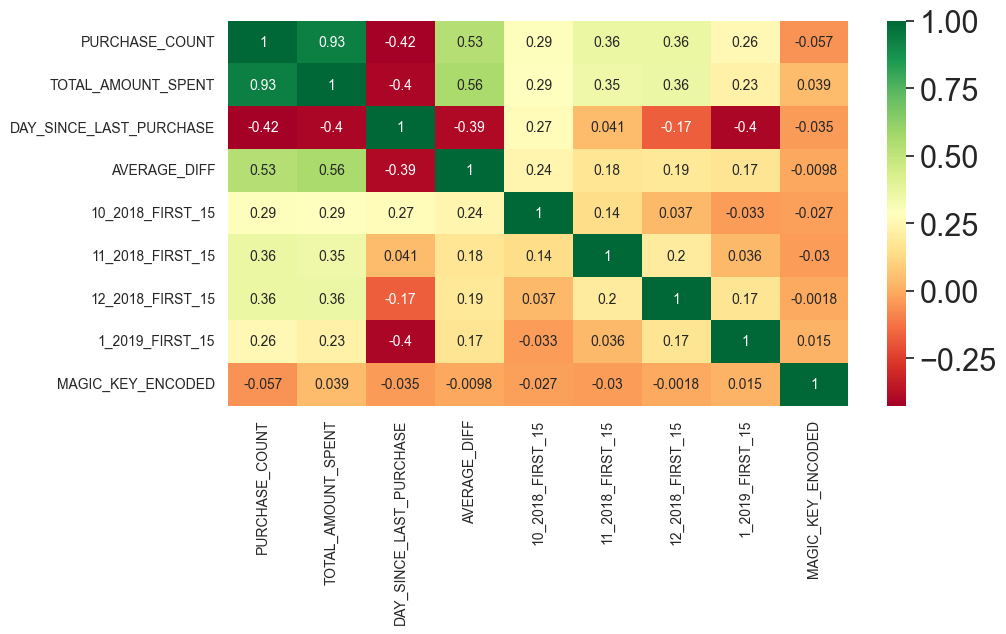

In [11]:
sns.set(font_scale = 2)
plt.subplots(figsize = (10, 5))
heat_plot = sns.heatmap(df_encoded.corr(method = 'pearson'), annot = True, cmap = 'RdYlGn', annot_kws={'size': 10})

plt.yticks(fontsize = 10)
plt.xticks(fontsize = 10)

plt.show()

In [12]:
correlation = df_encoded.corr(method = 'pearson') #finding all correlation between each features
print(correlation['1_2019_FIRST_15'].sort_values(ascending = False).to_string()) #printing correlation with class in descending order

1_2019_FIRST_15            1.000000
PURCHASE_COUNT             0.259461
TOTAL_AMOUNT_SPENT         0.225885
AVERAGE_DIFF               0.167165
12_2018_FIRST_15           0.166784
11_2018_FIRST_15           0.035927
MAGIC_KEY_ENCODED          0.015464
10_2018_FIRST_15          -0.033321
DAY_SINCE_LAST_PURCHASE   -0.403863


=> DAY_SINCE_LAST_PURCHASE  has higher corelation and purchase count, as well as total amount spent

In [13]:
from sklearn.utils import shuffle #importing the suffle module
shuffled_df = shuffle(df_encoded)
shuffled_df #checking

,PURCHASE_COUNT,TOTAL_AMOUNT_SPENT,DAY_SINCE_LAST_PURCHASE,AVERAGE_DIFF,10_2018_FIRST_15,11_2018_FIRST_15,12_2018_FIRST_15,1_2019_FIRST_15,MAGIC_KEY_ENCODED
992442,1,15.98,15,0,0,0,0,0,992442
685659,1,15.98,26,0,0,0,0,1,685659
885657,2,47.96,44,46,0,1,0,0,885657
890099,1,15.98,1,0,0,0,0,0,890099
404385,1,13.96,34,0,0,0,0,0,404385
...,...,...,...,...,...,...,...,...,...
1033334,1,11.96,5,0,0,0,0,0,1033334
483086,1,15.98,7,0,0,0,0,0,483086
52723,2,29.92,7,70,0,0,0,0,52723
30775,2,29.92,55,20,0,0,1,0,30775


In [14]:
#rearranging the index value
rearranged_df = shuffled_df.reset_index(drop = True)
rearranged_df

,PURCHASE_COUNT,TOTAL_AMOUNT_SPENT,DAY_SINCE_LAST_PURCHASE,AVERAGE_DIFF,10_2018_FIRST_15,11_2018_FIRST_15,12_2018_FIRST_15,1_2019_FIRST_15,MAGIC_KEY_ENCODED
0,1,15.98,15,0,0,0,0,0,992442
1,1,15.98,26,0,0,0,0,1,685659
2,2,47.96,44,46,0,1,0,0,885657
3,1,15.98,1,0,0,0,0,0,890099
4,1,13.96,34,0,0,0,0,0,404385
...,...,...,...,...,...,...,...,...,...
1048931,1,11.96,5,0,0,0,0,0,1033334
1048932,1,15.98,7,0,0,0,0,0,483086
1048933,2,29.92,7,70,0,0,0,0,52723
1048934,2,29.92,55,20,0,0,1,0,30775


In [15]:
X = rearranged_df.drop(columns = ['1_2019_FIRST_15']) #dropping the class collumn to separate the feature
X

,PURCHASE_COUNT,TOTAL_AMOUNT_SPENT,DAY_SINCE_LAST_PURCHASE,AVERAGE_DIFF,10_2018_FIRST_15,11_2018_FIRST_15,12_2018_FIRST_15,MAGIC_KEY_ENCODED
0,1,15.98,15,0,0,0,0,992442
1,1,15.98,26,0,0,0,0,685659
2,2,47.96,44,46,0,1,0,885657
3,1,15.98,1,0,0,0,0,890099
4,1,13.96,34,0,0,0,0,404385
...,...,...,...,...,...,...,...,...
1048931,1,11.96,5,0,0,0,0,1033334
1048932,1,15.98,7,0,0,0,0,483086
1048933,2,29.92,7,70,0,0,0,52723
1048934,2,29.92,55,20,0,0,1,30775


In [16]:
y =  rearranged_df['1_2019_FIRST_15'] #separating target to y
y

0          0
1          1
2          0
3          0
4          0
          ..
1048931    0
1048932    0
1048933    0
1048934    0
1048935    1
Name: 1_2019_FIRST_15, Length: 1048936, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split #importing module

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20) #80-20% split

In [19]:
print(len(X_train)) #checking
print(len(X_test))

839148
209788


In [20]:
print(len(y_train)) #checking
print(len(y_test))

839148
209788


In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
tree_clf = DecisionTreeClassifier(max_depth = 5, random_state = 42)
tree_clf.fit(X, y)
tree_clf.feature_importances_

array([0.01974045, 0.        , 0.95205186, 0.02820768, 0.        ,
       0.        , 0.        , 0.        ])

=> DAY_SINCE_LAST_PURCHASE is most important in this datasets

In [44]:
#creating instance of decision tree, depth 2
tree_clf = DecisionTreeClassifier(max_depth = 10, random_state = 42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [45]:
y_pred = tree_clf.predict(X_test)

In [46]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.9868009609701223

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
maxdepth = range(1, 31)
scores = []
for d in maxdepth:
    dt = DecisionTreeClassifier(max_depth = d, random_state = 42)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Testing Accuracy')

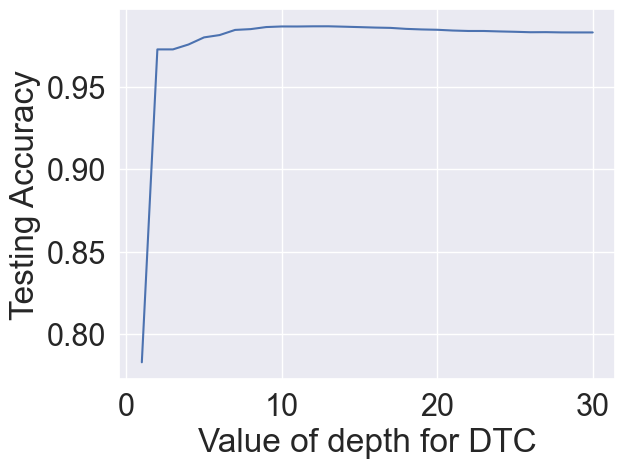

In [29]:
import matplotlib.pyplot as plt #importing marplotlib
#for showing inline
%matplotlib inline 


plt.plot(maxdepth, scores) #defining axis

plt.xlabel("Value of depth for DTC") #labeling the x-axis
plt.ylabel("Testing Accuracy") #labeling the y-axis

In [30]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=25, criterion="entropy", random_state = 42, max_depth=26, n_jobs=-1)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=26, n_estimators=25,
                       n_jobs=-1, random_state=42)

In [31]:
y_pred = classifier.predict(X_test)

In [32]:
metrics.accuracy_score(y_test, y_pred)

0.9865578584094419

In [33]:
df_feb = pd.read_csv('Datasets/test.csv')

In [34]:
df_feb

,MAGIC_KEY,PURCHASE
0,249670911D8,1
1,2497E36D1BF,1
2,2498CA210F2,1
3,249BD4201E6,1
4,249C911B64A,0
...,...,...
333498,2E6EA6209A6,1
333499,2E6EC555AF6,1
333500,2E6F53ECC13,0
333501,2E6F72C6F1C,1


In [35]:
df_test = pd.merge(df, df_feb, on = 'MAGIC_KEY')
df_test

,MAGIC_KEY,PURCHASE_COUNT,TOTAL_AMOUNT_SPENT,DAY_SINCE_LAST_PURCHASE,AVERAGE_DIFF,10_2018_FIRST_15,11_2018_FIRST_15,12_2018_FIRST_15,1_2019_FIRST_15,MAGIC_KEY_ENCODED,PURCHASE
0,249670911D8,1,13.96,92,0,0,1,0,0,0,1
1,2497E36D1BF,1,15.98,113,0,1,0,0,0,5,1
2,2498CA210F2,1,13.96,57,0,0,0,1,0,8,1
3,249BD4201E6,1,15.96,18,0,0,0,0,1,10,1
4,249C911B64A,6,93.76,5,22,1,1,1,1,12,0
...,...,...,...,...,...,...,...,...,...,...,...
333498,2E6EA6209A6,5,99.90,11,26,1,1,0,0,1048926,1
333499,2E6EC555AF6,4,79.92,17,29,0,0,0,1,1048927,1
333500,2E6F53ECC13,1,19.98,68,0,0,0,0,0,1048931,0
333501,2E6F72C6F1C,1,19.98,103,0,0,0,0,0,1048933,1


In [36]:
df_test = df_test.drop(columns = ['MAGIC_KEY'])
df_test = df_test.drop(columns = ['1_2019_FIRST_15'])

In [37]:
df_test

,PURCHASE_COUNT,TOTAL_AMOUNT_SPENT,DAY_SINCE_LAST_PURCHASE,AVERAGE_DIFF,10_2018_FIRST_15,11_2018_FIRST_15,12_2018_FIRST_15,MAGIC_KEY_ENCODED,PURCHASE
0,1,13.96,92,0,0,1,0,0,1
1,1,15.98,113,0,1,0,0,5,1
2,1,13.96,57,0,0,0,1,8,1
3,1,15.96,18,0,0,0,0,10,1
4,6,93.76,5,22,1,1,1,12,0
...,...,...,...,...,...,...,...,...,...
333498,5,99.90,11,26,1,1,0,1048926,1
333499,4,79.92,17,29,0,0,0,1048927,1
333500,1,19.98,68,0,0,0,0,1048931,0
333501,1,19.98,103,0,0,0,0,1048933,1


In [38]:
df_test_X = df_test.drop(columns = ['PURCHASE'])
df_test_X

,PURCHASE_COUNT,TOTAL_AMOUNT_SPENT,DAY_SINCE_LAST_PURCHASE,AVERAGE_DIFF,10_2018_FIRST_15,11_2018_FIRST_15,12_2018_FIRST_15,MAGIC_KEY_ENCODED
0,1,13.96,92,0,0,1,0,0
1,1,15.98,113,0,1,0,0,5
2,1,13.96,57,0,0,0,1,8
3,1,15.96,18,0,0,0,0,10
4,6,93.76,5,22,1,1,1,12
...,...,...,...,...,...,...,...,...
333498,5,99.90,11,26,1,1,0,1048926
333499,4,79.92,17,29,0,0,0,1048927
333500,1,19.98,68,0,0,0,0,1048931
333501,1,19.98,103,0,0,0,0,1048933


In [39]:
df_test_y = df_test['PURCHASE']
df_test_y

0         1
1         1
2         1
3         1
4         0
         ..
333498    1
333499    1
333500    0
333501    1
333502    1
Name: PURCHASE, Length: 333503, dtype: int64

In [40]:
y_pred = tree_clf.predict(df_test_X)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [41]:
metrics.accuracy_score(df_test_y, y_pred)

0.6719159947586678

In [42]:
y_pred = classifier.predict(df_test_X)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [43]:
metrics.accuracy_score(df_test_y, y_pred)

0.6641319568339715